In [1]:
import pandas as pd
from konlpy.tag import Okt
from gensim.models import word2vec

In [2]:
# 무관심 train_data불러오기
train = pd.read_csv("../../Data/train_data.csv")

In [3]:
train_list = []
for i in range(0, 80):
    train_list.append(train['가사'][i])

In [4]:
len(train_list)

80

---
# 토큰화1

In [5]:
# 텍스를 한 줄씩 처리하기
twitter = Okt()
results = []
lines = train_list
for line in lines:
    # 형태소 분석하기
    train_malist = twitter.pos(line,norm=True,stem=True) # 단어의 기본형 사용
    r = []
    for word in train_malist:
        # 어미, 조사, 구두점 등은 대상에서 제외
        if not word[1] in ["Josa","Eomi","Punctuation"]:
            if word[0] != "n":
                r.append(word[0]) # word[0] : data
    rl = (" ".join(r).strip())
    
    results.append(rl)
    #print(rl)

In [6]:
token_list = str(results).split(" ")

---
# 불용어 제거과정

In [9]:
import matplotlib.pyplot as plt

In [10]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [11]:
import nltk # national language tool kit
from konlpy.tag import Okt
import matplotlib.pyplot as plt
from wordcloud import WordCloud

t = Okt()

In [12]:
# 불용어 추가
# 실행해보면서 추가하면서 바꿔야함.
stop_words = []
token_ko1 = [each_word for each_word in token_list if each_word not in stop_words]
#print(token_ko1)

In [13]:
# 상위 50개 단어 확인
# 이걸보면서 불용어 지우는게 편해 전체는 힘들어
ko1 = nltk.Text(token_ko1)
ko1.vocab().most_common(50)

[('하다', 427),
 ('너', 356),
 ('내', 235),
 ('사랑', 211),
 ('있다', 187),
 ('나', 164),
 ('없다', 160),
 ('말', 139),
 ('보다', 128),
 ('이', 126),
 ('수', 122),
 ('그', 114),
 ('날', 107),
 ('그대', 103),
 ('우리', 101),
 ('더', 100),
 ('네', 100),
 ('널', 98),
 ('않다', 85),
 ('못', 83),
 ('같다', 83),
 ('난', 82),
 ('들', 75),
 ('것', 73),
 ('왜', 69),
 ('이별', 69),
 ('게', 66),
 ('나르다', 64),
 ('생각', 63),
 ('아프다', 62),
 ('다', 60),
 ('오다', 59),
 ('걸', 59),
 ('다시', 57),
 ('잊다', 56),
 ('되다', 54),
 ('싶다', 54),
 ('맘', 54),
 ('너무', 53),
 ('해', 52),
 ('밤', 52),
 ('시간', 50),
 ('내다', 50),
 ('알', 47),
 ('때', 46),
 ('이제', 46),
 ('사람', 46),
 ('마음', 45),
 ('보고', 44),
 ('좋다', 43)]

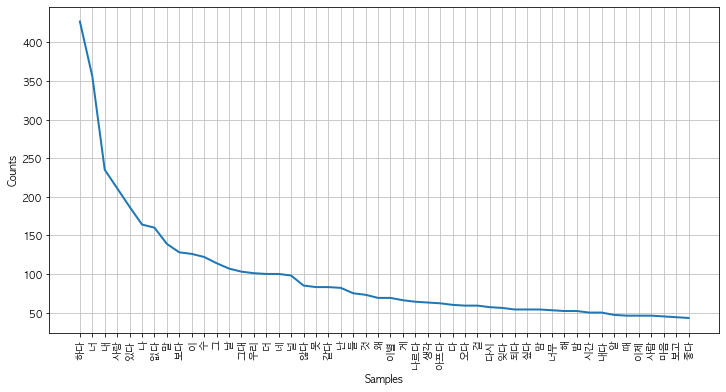

In [14]:
# 상위 50개의 빈도수 차트 만들기
plt.figure(figsize=(12,6))
ko1.plot(50)
plt.show()

In [15]:
# 상위 50개만 wordcloud로 그리기
# 구한데이터로 그리기
data1 = ko1.vocab().most_common(50)

# 딕셔너리로 만들기
tmp_data1 = dict(data1)

wordcloud1 = WordCloud(
    background_color='White',
    relative_scaling=0.8,
    font_path="AppleGothic" # 윈도우 => 'c:/Windows/Fonts/malgun.ttf'
).generate_from_frequencies(tmp_data1)

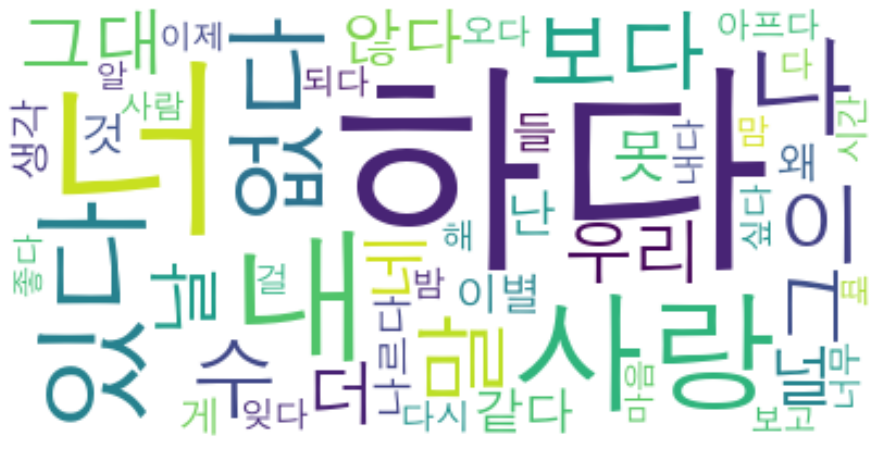

In [16]:
plt.figure(figsize=(16,8))
plt.imshow(wordcloud1, interpolation='bilinear')
plt.axis('off')
plt.show()

---
# 토큰화 2

In [17]:
# 텍스를 한 줄씩 처리하기
twitter = Okt()
results2 = []
lines = train_list
for line in lines:
    # 형태소 분석하기
    train_malist = twitter.pos(line,norm=True,stem=False) # 단어의 기본형 사용
    r = []
    for word in train_malist:
        # 어미, 조사, 구두점 등은 대상에서 제외
        if not word[1] in ["Josa","Eomi","Punctuation"]:
            if word[0] != "n":
                r.append(word[0]) # word[0] : data
    rl2 = (" ".join(r).strip())
    
    results2.append(rl2)
    #print(rl)

In [18]:
token_list2 = str(results2).split(" ")

---
# 불용어 체크 2

In [19]:
# 불용어 추가
# 실행해보면서 추가하면서 바꿔야함.
stop_words2 = []
token_ko2 = [each_word for each_word in token_list2 if each_word not in stop_words2]


In [20]:
# 상위 50개 단어 확인
# 이걸보면서 불용어 지우는게 편해 전체는 힘들어
ko2 = nltk.Text(token_ko2)
ko2.vocab().most_common(50)

[('너', 356),
 ('내', 235),
 ('사랑', 211),
 ('나', 164),
 ('말', 139),
 ('이', 126),
 ('수', 122),
 ('그', 114),
 ('날', 107),
 ('그대', 103),
 ('우리', 101),
 ('더', 100),
 ('네', 100),
 ('널', 98),
 ('해', 90),
 ('못', 83),
 ('난', 82),
 ('들', 78),
 ('것', 73),
 ('왜', 69),
 ('이별', 69),
 ('게', 66),
 ('나를', 64),
 ('생각', 63),
 ('다', 60),
 ('걸', 59),
 ('다시', 57),
 ('맘', 54),
 ('너무', 53),
 ('밤', 52),
 ('봐', 51),
 ('시간', 50),
 ('없는', 50),
 ('알', 47),
 ('때', 46),
 ('이제', 46),
 ('내게', 46),
 ('사람', 46),
 ('마음', 45),
 ('한', 45),
 ('보고', 44),
 ('할', 42),
 ('눈', 42),
 ('오늘', 39),
 ('젠', 39),
 ('속', 38),
 ('아직', 38),
 ('I', 37),
 ('기억', 36),
 ('같아', 36)]

> 결론 이게 더 쓸게 없다.

---
# 동사토큰

In [21]:
# 텍스를 한 줄씩 처리하기
twitter = Okt()
results3 = []
lines = train_list
for line in lines:
    # 형태소 분석하기
    train_malist = twitter.pos(line,norm=True,stem=True) # 단어의 기본형 사용
    r = []
    for word in train_malist:
        # 어미, 조사, 구두점 등은 대상에서 제외
        if word[1] in ["Verb"]:
            if word[0] != "n":
                r.append(word[0]) # word[0] : data
    rl3 = (" ".join(r).strip())
    
    results3.append(rl)
    #print(rl)

In [22]:
token_list3 = str(results3).split(" ")

In [23]:
# 불용어 추가
# 실행해보면서 추가하면서 바꿔야함.
stop_words3 = ['하다','찬','나','너','걸','수','다시다','내','고서','안','거','그','누구','보나','두','알','코','이','젠'\
                ,'난','해','널',',',"''",'곳',"안녕',","젤","'나르다","나다",'내다','잘',"그대","사람","하나요","안녕']"\
                ,"['나르다",
                ]
token_ko3 = [each_word for each_word in token_list3 if each_word not in stop_words3]


In [24]:
# 상위 50개 단어 확인
# 이걸보면서 불용어 지우는게 편해 전체는 힘들어
ko3 = nltk.Text(token_ko3)
ko3.vocab().most_common(100)

[('사랑', 720),
 ('안녕', 320),
 ('더', 240),
 ('아프다', 240),
 ('같다', 160),
 ('이미', 160),
 ('있다', 160),
 ('이별', 160),
 ('나르다', 160),
 ('만들다', 160),
 ('노래', 160),
 ('끝', 160),
 ('슬프다', 160),
 ('다시', 160),
 ('생각', 160),
 ('척', 160),
 ('아니다', 80),
 ('배우다', 80),
 ('않다', 80),
 ('늘', 80),
 ('더디다', 80),
 ('서두르다', 80),
 ('오다', 80),
 ('거리', 80),
 ('눈물', 80),
 ('짓다', 80),
 ('원래', 80),
 ('결국', 80),
 ('그땐', 80),
 ('없다', 80),
 ('바람', 80),
 ('불어오다', 80),
 ('붉다', 80),
 ('불다', 80),
 ('혼자', 80),
 ('솔직하다', 80),
 ('끝내', 80),
 ('말', 80),
 ('자리', 80),
 ('돌아오다', 80),
 ('상처', 80),
 ('받다', 80),
 ('너무', 80),
 ('두다', 80),
 ('여전하다', 80),
 ('가끔', 80),
 ('우연히', 80),
 ('만나다', 80),
 ('그냥', 80),
 ('모르다', 80),
 ('지나가다', 80),
 ('지우다', 80),
 ('끝나다', 80)]

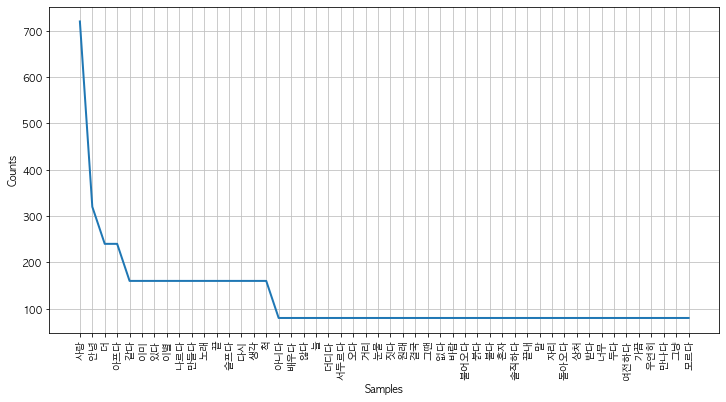

In [25]:
# 상위 50개의 빈도수 차트 만들기
plt.figure(figsize=(12,6))
ko3.plot(50)
plt.show()

In [26]:
# 상위 50개만 wordcloud로 그리기
# 구한데이터로 그리기
data3 = ko3.vocab().most_common(200)

# 딕셔너리로 만들기
tmp_data3 = dict(data3)

wordcloud3 = WordCloud(
    background_color='White',
    relative_scaling=0.8,
    font_path="AppleGothic" # 윈도우 => 'c:/Windows/Fonts/malgun.ttf'
).generate_from_frequencies(tmp_data3)

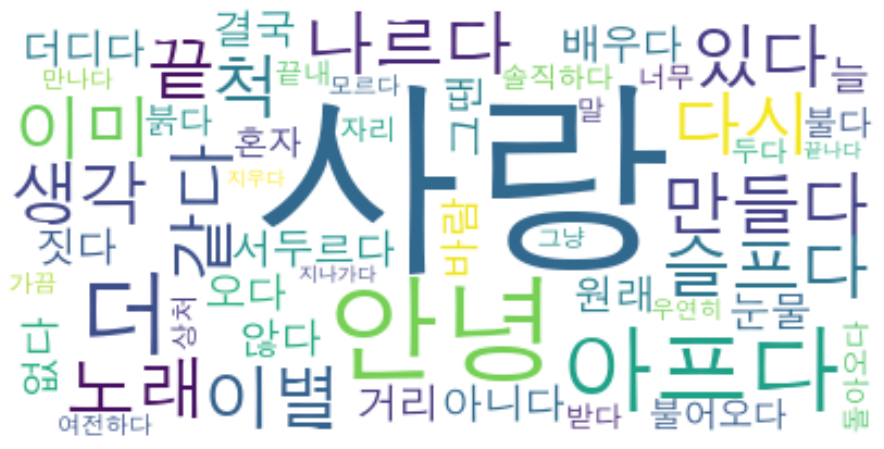

In [27]:
plt.figure(figsize=(16,8))
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis('off')
plt.show()

---
# 명사 토큰

In [28]:
# train_malist

In [29]:
# 텍스를 한 줄씩 처리하기
twitter = Okt()
results4 = []
lines = train_list
for line in lines:
    # 형태소 분석하기
    train_malist = twitter.pos(line,norm=True,stem=True) # 단어의 기본형 사용
    r = []
    for word in train_malist:
        # 어미, 조사, 구두점 등은 대상에서 제외
        if not word[1] in ["Josa","Eomi","Punctuation"]:
            if word[1] in ["Noun"]:
                if word[0] != "n":
                    r.append(word[0]) # word[0] : data
    rl4 = (" ".join(r).strip())
    
    results4.append(rl4)
    #print(rl)

In [30]:
token_list4 = str(results4).split(" ")

In [298]:
testing = []
for key, val in zip(list(ko4.vocab().keys()),list(ko4.vocab().values())):
    if val < 2:
        testing.append([key,val])

In [299]:
testing

[["['처음", 1],
 ['도시', 1],
 ['어귀', 1],
 ['별빛', 1],
 ['음악', 1],
 ['침묵', 1],
 ['부란', 1],
 ["때',", 1],
 ["'당신", 1],
 ['갑자기', 1],
 ['멍', 1],
 ['고요한', 1],
 ['워오', 1],
 ["'우연", 1],
 ['운명', 1],
 ['웃어요', 1],
 ["'언제", 1],
 ['휴식', 1],
 ['맑은', 1],
 ['지난날', 1],
 ['말로', 1],
 ['낯선', 1],
 ["'만", 1],
 ['거길', 1],
 ['정리', 1],
 ['치기', 1],
 ['타', 1],
 ["해',", 1],
 ['엊그제', 1],
 ['즘', 1],
 ['싸움', 1],
 ['자주', 1],
 ['입장', 1],
 ['오해', 1],
 ["진심',", 1],
 ['그대만', 1],
 ['눈망울', 1],
 ['별처럼', 1],
 ['꽃피', 1],
 ["'매일", 1],
 ['마다', 1],
 ['스토리', 1],
 ['멋', 1],
 ['부리고', 1],
 ['퉁', 1],
 ['그림', 1],
 ['누비', 1],
 ['하늘아래', 1],
 ["언제',", 1],
 ["'어제", 1],
 ['표정', 1],
 ['귀', 1],
 ['거란', 1],
 ["걸',", 1],
 ["'무엇", 1],
 ['캐시미어', 1],
 ['스웨터', 1],
 ['초록', 1],
 ['다홍색', 1],
 ['보라', 1],
 ['로', 1],
 ['골드', 1],
 ['걸인', 1],
 ['풀', 1],
 ['반지', 1],
 ['곱', 1],
 ['엮어', 1],
 ['지네', 1],
 ['녹지', 1],
 ['환희', 1],
 ['메리', 1],
 ['꿈속', 1],
 ["둘이서',", 1],
 ["'니", 1],
 ['익숙', 1],
 ['하단', 1],
 ['쪽', 1],
 ['구두', 1],
 ['맨발', 1],
 ['기만', 1],
 ['매', 1],
 ['굴'

In [304]:
testing2 = []
for i in range(len(testing)):
    testing2.append(str(testing[i][0]))

{'가기',
 '가까이',
 '가끔',
 '가도',
 '가득',
 '가슴',
 '가장',
 '가지',
 '각오',
 '갈수록',
 '감고',
 '거기',
 '거리',
 '거릴',
 '거짓말',
 '걱정',
 '걸음',
 '겁',
 '겨우',
 '겨울',
 '곁',
 '계속',
 '계절',
 '고민',
 '고백',
 '고생',
 '골목',
 '공기',
 '공백',
 '구름',
 '귓가',
 '그간',
 '그게',
 '그날',
 '그냥',
 '그녀',
 '그늘',
 '그대로',
 '그때',
 '그땐',
 '그리움',
 '글자',
 '기도',
 '기억',
 '기적',
 '기회',
 '길이',
 '깨달',
 '꼭',
 '꽃',
 '꽃처럼',
 '꿈',
 '끝',
 '나라',
 '나로',
 '날',
 '날수',
 '남아',
 '남지',
 '내게로',
 '내겐',
 '내일',
 '너뿐이',
 '노래',
 '노력',
 '누가',
 '누구',
 '누군가',
 '눈물',
 '눈빛',
 '눈앞',
 '눈치',
 '늘',
 '다가',
 '다른',
 '다시',
 '다음',
 '다짐',
 '다한',
 '단',
 '달라',
 '담배',
 '당신',
 '당장',
 '대가',
 '대답',
 '대신',
 '대체',
 '대화',
 '둘이서',
 '뒤척',
 '뒷모습',
 '드라마',
 '듣기',
 '듯이',
 '때문',
 '또',
 '룰',
 '마음',
 '마저',
 '마주',
 '마지막',
 '마치',
 '만난',
 '만날',
 '만약',
 '만이',
 '만큼',
 '말',
 '말투',
 '맘',
 '맘속',
 '매일',
 '맴',
 '머리',
 '먼저',
 '멀리',
 '멍하니',
 '몇',
 '모든',
 '모습',
 '목',
 '목소리',
 '몰래',
 '못',
 '무슨',
 '무한',
 '문',
 '문득',
 '문틈',
 '물',
 '미래',
 '미련',
 '미소',
 '미안',
 '미움',
 '밀면',
 '바',
 '바다',
 '바람',
 '바랬던',
 '바랬어',
 '바보',
 '

In [325]:
# 불용어 추가
# 실행해보면서 추가하면서 바꿔야함.
stop_words4 = ['내','너','네','우리','널','그대','넌','곳','나','수',"속","젠","게","알","해","거","미","일","우린","니","젠","때","알","걸"\
                "두","손","눈","것","이","두","볼","어디","하나요","아무","길","좀","뒤","척","안","마","모두","여기","건","비","품","번","줄"\
                ,"난난","살","그","더","난","사람","걸","'너","나나","땐","적","저기","채","입","그것","위","해도","수가","둘",\
                "듯","수',","사랑',","롤","요","저","감","'사랑","다시',","라면","은","뭐","땜","워","준","불","뿐","서서","순","울",\
                "우릴","남","발","춤","일도","란","전","온","중","말',","대도","만","낼","빈","오지","덜","방","무","진","투","드","돌",\
                "바랬는데","빗","오","보","거지","후","핀","잡","부시","거더","알',","게',","'혼자","수도","우리둘","래야","통해","'하루",\
                "애","아들","더욱더","전하","무엇","끝내기","티","겉","헤어지자","사이',","'나","'내","더',","굽","녹","테","세","'오늘",\
                "것',","'그대","그대',","너',","날',","친구","내겐","단","다가","누가","듯이","안고","물","활","첫","목","픈","바","몇",\
                "쉬","철","나라","죽","찬","지고","나로","감고","보이","운","다한","룰","식이","이면","날수","남지","만이","째깍","번이","날"
                ]
token_ko4 = [each_word for each_word in token_list4 if each_word not in stop_words4]
ko4 = nltk.Text(token_ko4)
token_ko5 = set(ko4.vocab()) - set(testing2)
token_ko5 = [each_word for each_word in token_list4 if each_word in token_ko5]
ko4 = nltk.Text(token_ko5)


In [326]:
# 상위 50개 단어 확인
# 이걸보면서 불용어 지우는게 편해 전체는 힘들어

ko4.vocab().most_common(500)

[('사랑', 204),
 ('말', 133),
 ('왜', 69),
 ('이별', 68),
 ('생각', 62),
 ('맘', 54),
 ('다시', 53),
 ('밤', 52),
 ('시간', 50),
 ('못', 49),
 ('이제', 46),
 ('마음', 44),
 ('보고', 43),
 ('오늘', 39),
 ('기억', 36),
 ('혼자', 35),
 ('그때', 33),
 ('끝', 32),
 ('눈물', 32),
 ('곁', 30),
 ('모습', 30),
 ('하루', 30),
 ('추억', 30),
 ('또', 30),
 ('모든', 29),
 ('정말', 29),
 ('혹시', 28),
 ('서로', 26),
 ('그날', 25),
 ('지금', 25),
 ('처음', 24),
 ('매일', 22),
 ('가슴', 22),
 ('세상', 22),
 ('꼭', 22),
 ('순간', 19),
 ('바람', 19),
 ('자꾸', 18),
 ('하나', 18),
 ('잠', 17),
 ('항상', 17),
 ('햇살', 16),
 ('멀리', 16),
 ('그게', 15),
 ('그냥', 15),
 ('후회', 15),
 ('다른', 14),
 ('전부', 14),
 ('노래', 14),
 ('그땐', 14),
 ('잡고', 13),
 ('사이', 13),
 ('소리', 13),
 ('남아', 13),
 ('만큼', 13),
 ('꿈', 12),
 ('노력', 12),
 ('사실', 12),
 ('조금', 12),
 ('마지막', 11),
 ('늘', 11),
 ('준비', 11),
 ('바보', 11),
 ('그녀', 11),
 ('술잔', 11),
 ('자꾸만', 10),
 ('반짝', 10),
 ('약속', 10),
 ('이해', 10),
 ('상처', 10),
 ('가끔', 9),
 ('옆', 9),
 ('점점', 9),
 ('글자', 9),
 ('얼굴', 9),
 ('귓가', 9),
 ('자리', 9),
 ('크리스마스', 9),


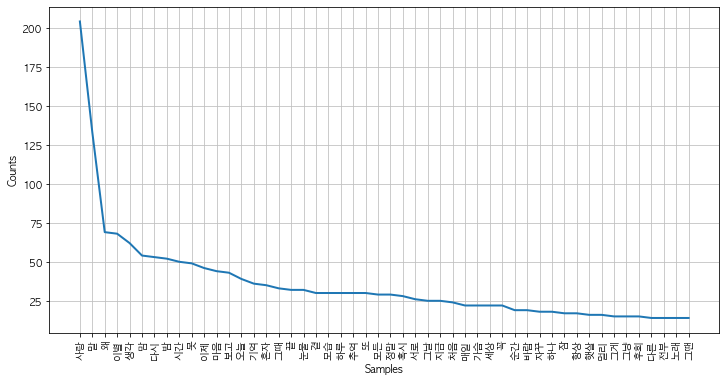

In [328]:
# 상위 50개의 빈도수 차트 만들기
plt.figure(figsize=(12,6))
ko4.plot(50)
plt.show()

In [329]:
# 상위 50개만 wordcloud로 그리기
# 구한데이터로 그리기
data4 = ko4.vocab().most_common(100)

# 딕셔너리로 만들기
tmp_data4 = dict(data4)

wordcloud4 = WordCloud(
    background_color='White',
    relative_scaling=0.8,
    font_path="AppleGothic" # 윈도우 => 'c:/Windows/Fonts/malgun.ttf'
).generate_from_frequencies(tmp_data4)

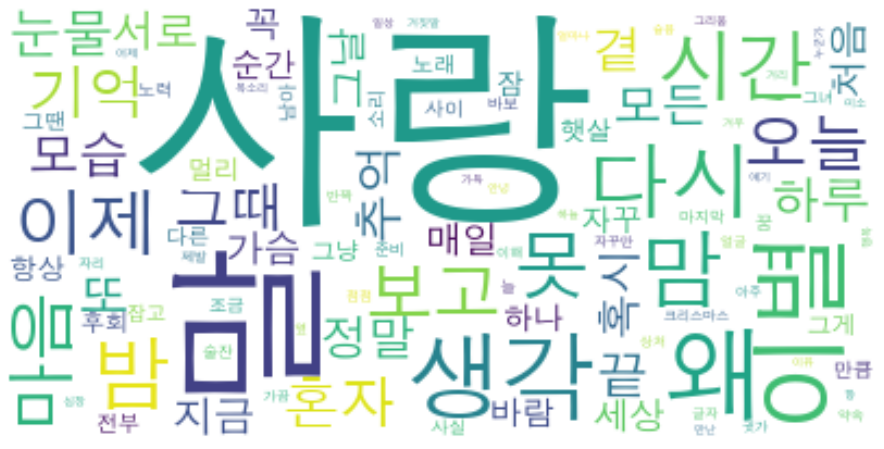

In [330]:
plt.figure(figsize=(16,8))
plt.imshow(wordcloud4, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# 파일로 출력하기 
wakati_file = "../../Data/ballad_indifference20.wakati"
with open(wakati_file, 'w', encoding = 'utf-8') as fp:
    fp.write("\n".join(results))

In [ ]:
# word2vec 모델 만들기 
data = word2vec.LineSentence(wakati_file)
model = word2vec.Word2Vec(data, window = 10, hs = 1, min_count=2, sg = 1) 
# hs = 1 (숫자, 특수문자 제외)
# sg = 1 (skip gram, 문법 체크 제외)
model.save("../../Data/ballad_indifference20.model")
print("OK")

OK


In [ ]:
# 모델 사용하기 
model = word2vec.Word2Vec.load("../../Data/ballad_indifference20.model")

In [ ]:
# 가장 의미 비슷한 단어 찾기 
model.wv.most_similar(positive = ['이별'])

[('끝나다', 0.9960851073265076),
 ('잖다', 0.9950804114341736),
 ('오지', 0.9941145777702332),
 ('다른', 0.9939598441123962),
 ('아니다', 0.9922330379486084),
 ('인연', 0.9921867251396179),
 ('끝내다', 0.9921315312385559),
 ('숨', 0.9919196963310242),
 ('보고', 0.991874098777771),
 ('되돌리다', 0.9918060898780823)]

In [ ]:
# 가장 의미 비슷한 단어 찾기 
model.wv.most_similar(negative=['이별'])

[('번호', -0.9089714884757996),
 ('그늘', -0.9111995100975037),
 ('그것', -0.9154554009437561),
 ('시간', -0.9205129742622375),
 ('어떻다', -0.9260929822921753),
 ('대다', -0.9296623468399048),
 ('나', -0.9363697171211243),
 ('오다', -0.939329981803894),
 ('남아', -0.9414581060409546),
 ('짧다', -0.9420595169067383)]

In [ ]:
okt = Okt()
text = indif.loc[0,'가사']

print("[Okt 함수: stem사용하여 어간 추출]")
result_stem = okt.morphs(text, stem= True)
print(result_stem )

print("[OKt nouns 함수]")
result_nouns = okt.nouns(text)
print(result_nouns)

print("[Okt phrases 함수]")
result_phrases = okt.phrases(text)
print(result_phrases)

print("[Okt pos 함수]")
result_pod = okt.pos(text)
print(result_pod)

[Okt 함수: stem사용하여 어간 추출]
['반복', '되다', '하루', '살다', '일', '에', '지치다', '때', '면', '내다', '말', '하다', '항상', '그대', '의', '지치다', '마음', '에', '조그만', '위로', '돼다', '요즘', '유행', '하다', '영화', '보고', '플', '땐', '내다', '말', '하다', '내겐', '그대', '의', '작다', '부탁', '조차도', '조그만', '행복', '이', '죠', '아무렇다', '약속', '도', '없다', '일요일', '오후', '늦다', '잠', '에서', '깨', '이유', '없이', '괜히', '서글퍼지다', '땐', '그대', '곁', '엔', '세상', '누구', '보다', '그', '대다', '이해', '하다', '내', '자신', '보다', '그', '대다', '먼저', '생각', '하다', '사람', '이', '있다', '오랫동안', '항상', '지키다', '오다', '그대', '빈자리', '이', '젠', '들어오다', '편하다', '쉬다', '혼자', '서', '밥', '먹기', '싫다', '땐', '다른', '사람', '찾다', '말다', '내겐', '그대', '의', '짜증', '섞이다', '투', '정도', '조그만', '기쁨', '이', '죠', '아무렇다', '약속', '도', '없다', '일요일', '오후', '누군가', '만나다', '하루', '종일', '거릴', '걷다', '싶다', '땐', '그대', '곁', '엔', '세상', '누구', '보다', '그', '대다', '이해', '하다', '내', '자신', '보다', '그', '대다', '먼저', '생각', '하다', '사람', '이', '있다', '오랫동안', '항상', '지키다', '오다', '그대', '빈자리', '이', '젠', '들어오다', '편하다', '쉬다']
[OKt nouns 함수]
['반복', '하루', '일', '때', '말', '항상', '그대',